# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Linear%20Regression%20(ML%20approach)/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Linear Regression: Machine learning approach

In this module, we delve into the world of linear regression models through the lens of machine learning. We also look into polynomial regression models, which is an extension of linear regression. We delve into the optimization problem and explore the art of fine-tuning the hyper-parameters. Finally, we conclude by highlighting the key considerations and limitations of using polynomial models.

In this notebook we cover applying both Linear and polynomial regression models in Python using **Sklearn** and **PyCaret** package.

Let's beging by importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state= 100

In [4]:
# let's import the Boston dataset
#from sklearn.datasets import load_boston

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/boston_clean.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The "B" variable in the Boston Housing dataset refers to the proportion of African American residents in the neighborhood and it has been considered unethical for a few reasons:

1. Racial discrimination: The inclusion of a variable that represents the racial makeup of a neighborhood may perpetuate racial discrimination in the housing market by influencing the prices of homes based on the racial composition of the neighborhood.

2. Privacy: The collection and use of data about the racial makeup of a neighborhood may also raise privacy concerns and be considered a violation of individual rights.

3. Bias: Using the racial makeup of a neighborhood as a predictor in a housing price model may also introduce bias into the model and affect its accuracy.

So we are not going to use this variable in our research.

In [6]:
df.drop('B', axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Explanatory Data Analysis: EDA

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
price      0
dtype: int64

In [8]:
df.duplicated().sum()

0

Since there is neither NA values, nor duplicated ones, we move on to the next step!

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population

Let's decide on the type of each variable:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
price      229
dtype: int64

* Based on the numbers above, it seems that CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, LSTAT and price should be continuous. (No need to change)
* CHAS should be categorical.
* RAD should be ordinal categorical. why?

## Making dummy variables:

In [12]:
df['CHAS']= df['CHAS'].astype('category')

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [14]:
df['CHAS']=pd.get_dummies(df['CHAS'], drop_first=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Making Ordinal Categoricals

Ordinal Encoding is a type of encoding for handling categorical data. In this technique, each unique category value is assigned an integer value. Ordinal encoding is suitable for ordinal data, where the categories have a meaningful order or ranking among them, but the intervals between the categories are not defined.


**Example**:

Consider a feature "Education Level" with three categories: "High School", "Bachelor's", and "Master's". Since these categories have a meaningful order, we can assign them integer values:

* High School: 1
* Bachelor's: 2
* Master's: 3

The RAD variable in the Boston dataset from sklearn represents the index of accessibility to radial highways. This is an ordinal variable, where a higher value indicates better accessibility to highways.

Now let's change the RAD variable into ordinal categorical using sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [15]:
df.RAD.value_counts().sort_index()

1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: RAD, dtype: int64

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [17]:
df['RAD']= enc.fit_transform(df[['RAD']])


In [18]:
df.RAD.value_counts().sort_index()

0.0     20
1.0     24
2.0     38
3.0    110
4.0    115
5.0     26
6.0     17
7.0     24
8.0    132
Name: RAD, dtype: int64

# Making dummy variables with OneHot encoding

One-Hot Encoding is a popular method to convert categorical data into a binary matrix (0 and 1), where each category is represented as a new feature (or column) with a binary value. It is useful for nominal data where there is no inherent order among the categories.

pd.get_dummies sometimes give strange results, so we can use sklearn.preprocessing.OneHotEncoder.

let's try one-hot encoding for CHAS and RAD variables.

In [19]:
df_ohe = df.copy()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

df_ohe['CHAS'] = ohe.fit_transform(df_ohe[['CHAS']]).toarray()

df_ohe.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2


In [20]:
ohe.categories_

[array([0, 1], dtype=uint8)]

In [21]:
ohe = OneHotEncoder(drop='first')
RAD = ohe.fit_transform(df_ohe[['RAD']]).toarray()
RAD

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
ohe.categories_

[array([0., 1., 2., 3., 4., 5., 6., 7., 8.])]

In [23]:
RAD_column_names = ohe.get_feature_names_out(input_features=['RAD'])
RAD_column_names

array(['RAD_1.0', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0', 'RAD_6.0',
       'RAD_7.0', 'RAD_8.0'], dtype=object)

In [24]:
df_ohe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2


In [25]:
df_ohe = pd.concat([df_ohe, pd.DataFrame(RAD, columns=RAD_column_names)], axis=1)
# now that we have the one hot encoded columns we can drop the original column
df_ohe.drop('RAD', axis=1, inplace=True)
df_ohe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


for the rest of the notebook, we will be working with the df (the one with CHAS dummy and RAD ordinal encoded and not onehot encoded)

# Removing outliers

We can remove the observations that are outside +-3 standard deviations from the average. This includes 99.73% of the data. You can be more conservative and change the range to +-2 standard deviation (96% of the data)

**Important**: You should not apply removing outliers to categorical variables! why?

In [26]:
df.shape

(506, 13)

In [27]:
categorics = ['CHAS', 'RAD']

In [28]:
df.drop(categorics, axis=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48,22.0


In [29]:
from scipy import stats

(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 )

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True


In [30]:
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
501    True
502    True
503    True
504    True
505    True
Length: 506, dtype: bool

In [31]:
# show me how to remove outliers from a dataset?
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1).sum()

469

In [32]:
df = df[(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1)]

In [33]:
df.shape

(469, 13)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     469 non-null    float64
 1   ZN       469 non-null    float64
 2   INDUS    469 non-null    float64
 3   CHAS     469 non-null    uint8  
 4   NOX      469 non-null    float64
 5   RM       469 non-null    float64
 6   AGE      469 non-null    float64
 7   DIS      469 non-null    float64
 8   RAD      469 non-null    float64
 9   TAX      469 non-null    float64
 10  PTRATIO  469 non-null    float64
 11  LSTAT    469 non-null    float64
 12  price    469 non-null    float64
dtypes: float64(12), uint8(1)
memory usage: 48.1 KB


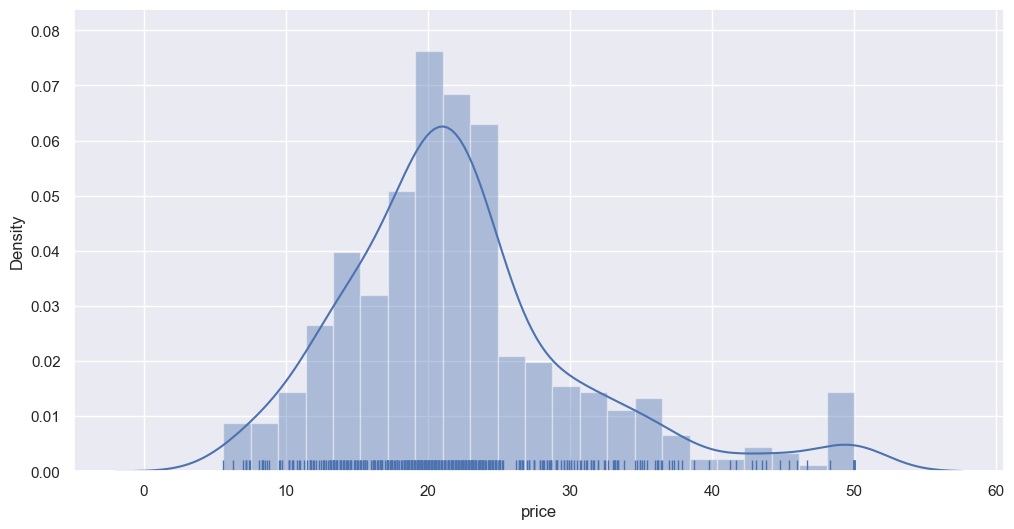

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'], rug=True)
plt.show()

**Exercise**: What do you infer from the distribution plot of the target variable? what should we do with that variable?

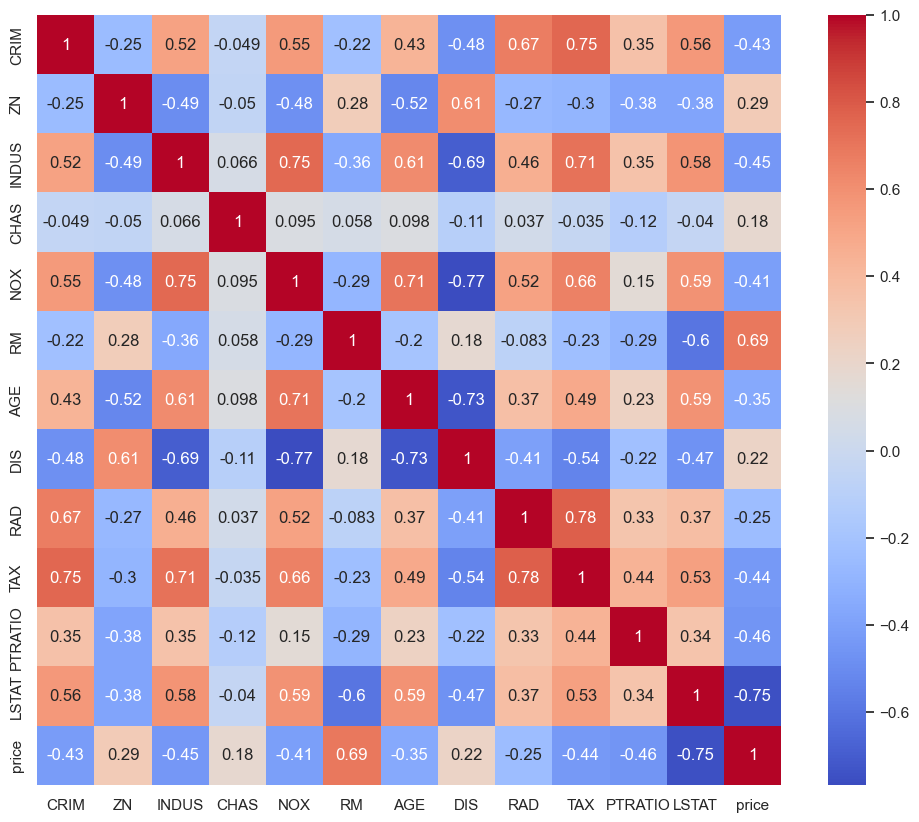

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population

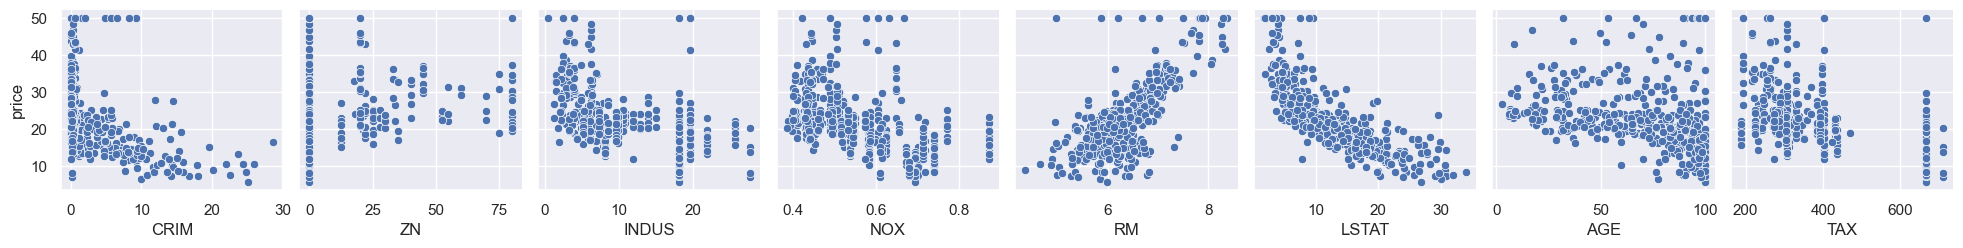

In [37]:
sns.pairplot(data=df, y_vars= ['price'], x_vars= ['CRIM','ZN','INDUS','NOX','RM','LSTAT', 'AGE', 'TAX'])
plt.show()

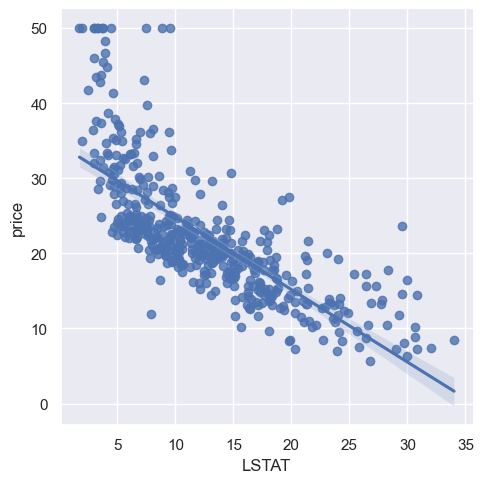

In [38]:
sns.lmplot(x='LSTAT', y='price', data=df)
plt.show()

It seems that there is a non-linear relationship between price and LSTAT. We will explore this idea in our next lecture: Polynomial regression.


In [39]:
#let's save this dataframe for future assignments:
df.to_csv('boston_clean.pkl',index=False)

## Train and Test set Split
It is time to split the data set into train and test.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [40]:
df.shape

(469, 13)

In [41]:
y = df['price']
X = df.drop('price', axis=1 , inplace=False) # be careful to set inplace= False.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [42]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
344,0.03049,55.0,3.78,0,0.484,6.874,28.1,6.4654,4.0,370.0,17.6,4.61
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,8.0,666.0,20.2,13.11
33,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,3.0,307.0,21.0,18.35
51,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,3.0,243.0,16.8,9.43
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,0.0,265.0,15.6,4.38


In [43]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
93,0.02875,28.0,15.04,0,0.4640,6.211,28.9,3.6659,3.0,270.0,18.2,6.21
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,3.0,280.0,17.0,5.99
268,0.54050,20.0,3.97,0,0.5750,7.470,52.6,2.8720,4.0,264.0,13.0,3.16
468,15.57570,0.0,18.10,0,0.5800,5.926,71.0,2.9084,8.0,666.0,20.2,18.13
279,0.21038,20.0,3.33,0,0.4429,6.812,32.2,4.1007,4.0,216.0,14.9,4.85


## Scaling the features
Now let's scale the features. Remember, we train the scaler on the train set and then transform both train and test with the scaler. why?
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**Important**: Note that we don't scale multi-level categorical variables. Why? Binary variables are just fine thought to be scaled.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
344,0.03049,55.0,3.78,0,0.484,6.874,28.1,6.4654,4.0,370.0,17.6,4.61
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,8.0,666.0,20.2,13.11
33,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,3.0,307.0,21.0,18.35
51,0.04337,21.0,5.64,0,0.439,6.115,63.0,6.8147,3.0,243.0,16.8,9.43
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,0.0,265.0,15.6,4.38


In [46]:
X_train.shape

(375, 12)

In [47]:
X_train_sc= scaler.fit_transform(X_train.drop(categorics, axis=1))
X_test_sc= scaler.transform(X_test.drop(categorics, axis=1))

In [48]:
# note, X_train_sc and X_test_sc are not dataframes anymore. That's just fine. Sklearn handels np.arrays
X_train_sc[:2]

array([[-0.54596786,  2.45018568, -1.10848165, -0.62047642,  0.90570645,
        -1.47741913,  1.47407572, -0.20164071, -0.38135388, -1.1783183 ],
       [ 2.40023999, -0.47370587,  0.99825649,  0.51805742, -0.11120786,
         0.68846397, -0.90858522,  1.57429512,  0.84133614,  0.08031565]])

In [49]:
X_train_sc.shape

(375, 10)

In [50]:
# we can convert them to dataframes again:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.drop(categorics, axis=1).columns)
X_train_sc[categorics] = X_train[categorics].reset_index(drop=True)
X_train_sc.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,CHAS,RAD
0,-0.545968,2.450186,-1.108482,-0.620476,0.905706,-1.477419,1.474076,-0.201641,-0.381354,-1.178318,0,4.0
1,2.400240,-0.473706,0.998256,0.518057,-0.111208,0.688464,-0.908585,1.574295,0.841336,0.080316,0,8.0
2,-0.315014,-0.473706,-0.467045,-0.147547,-0.943659,0.941572,0.060482,-0.579627,1.217548,0.856226,0,3.0
3,-0.543315,0.642689,-0.834841,-1.014584,-0.290942,-0.215494,1.658441,-0.963613,-0.757566,-0.464599,0,3.0
4,-0.549284,2.715994,-1.233532,-1.347386,0.480021,-1.813691,1.344339,-0.831618,-1.321885,-1.212375,0,0.0
5,-0.546623,-0.473706,-0.624462,-0.751846,0.191502,0.359423,0.683251,-0.969613,-0.287301,-0.507540,0,1.0
6,0.818547,-0.473706,0.998256,1.385095,0.027534,0.507672,-0.495201,1.574295,0.841336,0.210621,0,8.0
7,-0.250822,-0.473706,1.215992,0.439236,1.875322,0.789707,-0.898187,-0.003648,-1.745124,-1.604773,0,4.0
8,-0.376743,-0.473706,-0.467045,-0.147547,-0.527433,0.731854,0.179294,-0.579627,1.217548,0.186929,0,3.0
9,0.208467,-0.473706,0.998256,1.385095,0.120554,0.702927,-0.583504,1.574295,0.841336,0.308351,0,8.0


In [51]:
X_train_sc.shape

(375, 12)

In [52]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.drop(categorics, axis=1).columns)
X_test_sc[categorics] = X_test[categorics].reset_index(drop=True)
X_test_sc.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,CHAS,RAD
0,-0.546326,1.014821,0.548074,-0.795635,-0.139587,-1.448492,-0.003541,-0.801619,-0.099195,-0.941399,0,3.0
1,-0.549156,3.779227,-1.368882,-1.049616,0.528896,-1.419566,2.465628,-0.741621,-0.663513,-0.973975,0,3.0
2,-0.440915,0.589527,-1.080529,0.176497,1.845367,-0.591540,-0.422573,-0.837618,-2.544575,-1.393026,0,4.0
3,2.656070,-0.473706,0.998256,0.220287,-0.588921,0.073773,-0.403361,1.574295,0.841336,0.823650,0,8.0
4,-0.508914,0.589527,-1.174685,-0.980428,0.807957,-1.329170,0.225952,-1.125607,-1.651070,-1.142780,0,4.0
5,0.358663,-0.473706,0.998256,0.255319,-0.467522,0.923493,-0.597650,1.574295,0.841336,1.296008,0,8.0
6,-0.545836,-0.473706,-1.018739,-0.988310,-0.450179,-0.739789,2.291238,-0.309637,0.182965,-0.301717,0,2.0
7,-0.533372,-0.473706,-0.074238,-1.242291,-0.369772,-2.211433,0.852257,-0.591627,0.371071,-1.043570,0,3.0
8,4.606805,-0.473706,0.998256,1.209936,-0.492748,1.122364,-1.099865,1.574295,0.841336,2.103014,0,8.0
9,-0.546277,1.652761,-1.480692,-1.102164,1.008186,-1.246006,2.702142,-0.411633,0.606203,-0.988783,0,0.0


In [53]:
X_test_sc.shape

(94, 12)

----
----

# Linear Regression with Scikit-Learn

**Scikit-learn** is a very powerful package enabling you to do almost everything in machine learning including Regression, Classification, Clustering, SVM and Dimensionality reduction. However, I don't recommend sklearn for deep learning algorithms. Pytorch and Tensorflows are better alternatives for deep learning.

In [54]:
# recall, we imported the LinearRegression model from the sklearn.linear_model already!
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)

In [55]:
reg_model = LinearRegression()

In [56]:
reg_model.fit(X_train_sc, y_train)

LinearRegression()

### Predictions:

In [57]:
y_hat = reg_model.predict(X_test_sc)

In [58]:
y_hat

array([28.05708466, 25.58448564, 39.385196  , 15.90762192, 34.4528852 ,
       14.65621398, 17.1712832 , 25.07535082, 10.92086316, 22.22192136,
       28.85408999, 31.94024896, 10.05275481, 27.26971186, 16.56898708,
       24.32031295, 23.23435481, 16.76004774, 11.75652025, 11.97521582,
        1.20483535, 27.83662614, 15.27504461, 15.56472441, 16.6811326 ,
       16.18145858, 24.04838049, 25.29640572, 16.19098172, 20.41401478,
       24.80944593, 18.78248473, 19.94925451, 19.52052205, 25.2188447 ,
       20.94989191, 12.85982383, 25.74387412, 26.07249764, 11.41730984,
       13.25499187, 15.05600555, 32.53066937, 21.65905037, 15.04755637,
       21.15909614, 17.00099699, 33.091018  , 16.55728913, 12.97198826,
       23.82522208, 18.44137433, 25.62921746, 17.21719025, 26.46272849,
       40.90120557, 19.08126402, 23.4240606 ,  5.53683894, 14.757708  ,
       24.68854646, 33.44584135, 32.43985197, 17.84193688, 17.92460732,
       20.96879944, 20.75642199, 28.44727302, 16.75160691, 22.20

In [59]:
test_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
test_predictions.head()

,actuals,predictions,resid
93,25.0,28.057085,-3.057085
348,24.5,25.584486,-1.084486
268,43.5,39.385196,4.114804
468,19.1,15.907622,3.192378
279,35.1,34.452885,0.647115


###  Coefficients:
try reg_model.

In [60]:
# reg_model.

In [61]:
# The coefficients of the regression
reg_model.coef_

array([-0.00959638,  0.14111894,  0.3525931 , -1.57909536,  2.96534603,
       -0.15445361, -2.29219071, -1.29748783, -1.84549836, -4.00592522,
        2.9042634 ,  0.41540906])

In [62]:
# The intercept of the regression
reg_model.intercept_

20.400525497684455

In [63]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'price'],
      dtype='object')

In [64]:
# Let's create a new data frame with the names of the features. Usually we don't do this in Machine Learning! why?

reg_summary = pd.DataFrame({'Features':df.columns[:-1] , 'Coefficients':np.round(reg_model.coef_,4)})
reg_summary

,Features,Coefficients
0,CRIM,-0.0096
1,ZN,0.1411
2,INDUS,0.3526
3,CHAS,-1.5791
4,NOX,2.9653
5,RM,-0.1545
6,AGE,-2.2922
7,DIS,-1.2975
8,RAD,-1.8455
9,TAX,-4.0059


## Evaluation metrics:

One of the downsides of sklearn package is that, for linear regression models, the only built-in evaluation metric is R-squared (score). We need to mannually construct the other evaluation metrics like MSE, RMSE, adjusted R-squared, AIC, BIC, and etc.

Alternatively we could have used statsmodel package and get a nice summary table.

### R-squared

In [65]:
# The train set R-squared of the regression
reg_model.score(X_train_sc,y_train)

0.731353350293989

In [66]:
print('Training data R-squared:', np.round(reg_model.score(X_train_sc, y_train),3))
print(f'Test data R-squared: {np.round(reg_model.score(X_test_sc, y_test),3)}')

Training data R-squared: 0.731
Test data R-squared: 0.723


### MSE and RMSE
This is the most common metric used for comparing linear regression models!

In [67]:
test_predictions.head()

,actuals,predictions,resid
93,25.0,28.057085,-3.057085
348,24.5,25.584486,-1.084486
268,43.5,39.385196,4.114804
468,19.1,15.907622,3.192378
279,35.1,34.452885,0.647115


In [68]:
MSE_test = np.mean(np.square(test_predictions['resid']))
np.round(MSE_test,3)

16.838

In [69]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

4.103

## Cross Validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

From the lecture slides, we know that we could use CV for two purposes:
1. Model architecture selection / Tuning hypyer parameters
2. Fair estimate of the performance of the model in the test set

Here, we don't have any hyper parameters in the model, so we will use cross validation to estimate the test set evaluation metrics!

*Remember, we are interested in model performance in the test set not train set!! and we can estimate that number by finding the cross validated version.*

In [70]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [71]:
# What performance metrics are available in sklearn?
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [72]:
R2 = cross_val_score(estimator=LinearRegression(), X=X_train_sc, y=y_train, cv=5, scoring="r2")

In [73]:
R2

array([0.81453448, 0.6030427 , 0.70729381, 0.83513299, 0.4621179 ])

In [74]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.684

This is the estimated version of $R^2_{test}$

In [75]:
MSE = -cross_val_score(estimator=LinearRegression(), X=X_train_sc, y=y_train, cv=10, scoring="neg_mean_squared_error")

In [76]:
MSE

array([14.67231101, 16.45550411, 26.28631254, 42.74319173, 21.40183412,
       18.63494026, 10.90923611, 29.17459871, 11.98338121, 39.80902372])

In [77]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

23.207

This is the estimated version of **MSE_test**

In [78]:
RMSE = np.sqrt(MSE)
RMSE

array([3.83044528, 4.05653844, 5.1270179 , 6.53782775, 4.62621164,
       4.31682062, 3.30291328, 5.40135156, 3.46170207, 6.30943926])

In [79]:
RMSE_CV = np.mean(RMSE)
np.round(RMSE_CV,3)

4.697

This is the estimated version of **RMSE_test**

# Linear Regression: Econometrics approach


-------------
We usually stop here for Machine Learning Linear Regression analysis. However, if you need to report more evaluation metrics, it would be much easier to use statsmodel package. Statsmodel is great for **interpretation aspect** of linear regression models. Also Statsmodel works perfectly with pandas dataframe. However, sklearn is a more **practical** package preferred by ML practicitionairs to apply regression analysis. If you want to know more about the details, refer to the additional link at the end of this notebook.

In [80]:
import statsmodels.api as sm

In [81]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test_sc)
X_train_wc = sm.add_constant(X_train_sc)

In [82]:
# Fit the model
model = sm.OLS(y_train.reset_index(drop=True),X_train_wc)
statsmodels_reg= model.fit()

In [83]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     82.12
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.79e-95
Time:                        13:14:08   Log-Likelihood:                -1100.7
No. Observations:                 375   AIC:                             2227.
Df Residuals:                     362   BIC:                             2278.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4005      0.846     24.123      0.000      18.737      22.064
CRIM          -0.0096      0.399     -0.024      0.981      -0.794       0.774
ZN             0.1411      0.339      0.417      0.677      -0.525       0.807
INDUS          0.3526      0.451      0.782      0.435      -0.535       1.240
NOX           -1.5791      0.491     -3.216      0.001      -2.545      -0.613
RM             2.9653      0.329      9.008      0.000       2.318       3.613
AGE           -0.1545      0.408     -0.379      0.705      -0.957       0.648
DIS           -2.2922      0.454     -5.054      0.000      -3.184      -1.400
TAX           -1.2975      0.576     -2.253      0.025      -2.430      -0.165
PTRATIO       -1.8455      0.312     -5.918      0.000      -2.459      -1.232
LSTAT         -4.0059      0.415     -9.658      0.000      -4.822      -3.190
CHAS           2.9043      0.996      2.916      0.004       0.946       4.863
RAD            0.4154      0.176      2.355      0.019       0.069       0.762
==============================================================================
Omnibus:                      193.831   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.748
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      11.977   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'price'],
      dtype='object')

In [85]:
# remember reg_summary from sklearn
reg_summary

,Features,Coefficients
0,CRIM,-0.0096
1,ZN,0.1411
2,INDUS,0.3526
3,CHAS,-1.5791
4,NOX,2.9653
5,RM,-0.1545
6,AGE,-2.2922
7,DIS,-1.2975
8,RAD,-1.8455
9,TAX,-4.0059


---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [86]:
#only if you want to run it in Google Colab:
# for this chapter, we can install the light version of PyCaret as below.

!pip install pycaret

In [86]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button.

# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.2.0'

In [87]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2


In [88]:
from pycaret.regression import *

In [89]:
setup(df, target='price', session_id=1000, train_size=0.8, fold_strategy='kfold', fold=5,
      normalize=True, normalize_method='zscore')

,Description,Value
0,Session id,1000
1,Target,price
2,Target type,Regression
3,Original data shape,"(469, 13)"
4,Transformed data shape,"(469, 13)"
5,Transformed train set shape,"(375, 13)"
6,Transformed test set shape,"(94, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [90]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [91]:
lr = create_model(estimator='lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0006,15.4820,3.9347,0.7921,0.2182,0.1680
1,3.3564,24.0550,4.9046,0.7156,0.2357,0.1501
2,3.3268,23.2493,4.8217,0.6915,0.2518,0.1877
3,3.0268,14.7356,3.8387,0.7184,0.2341,0.1578
4,3.7045,35.5101,5.9590,0.6147,0.2258,0.1602
Mean,3.2830,22.6064,4.6918,0.7065,0.2331,0.1648
Std,0.2570,7.5063,0.7706,0.0569,0.0112,0.0128


In [92]:
tuned_lr = tune_model(lr) # why the ouput is exactly the same as untuned model?

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0006,15.4820,3.9347,0.7921,0.2182,0.1680
1,3.3564,24.0550,4.9046,0.7156,0.2357,0.1501
2,3.3268,23.2493,4.8217,0.6915,0.2518,0.1877
3,3.0268,14.7356,3.8387,0.7184,0.2341,0.1578
4,3.7045,35.5101,5.9590,0.6147,0.2258,0.1602
Mean,3.2830,22.6064,4.6918,0.7065,0.2331,0.1648
Std,0.2570,7.5063,0.7706,0.0569,0.0112,0.0128


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Plot model

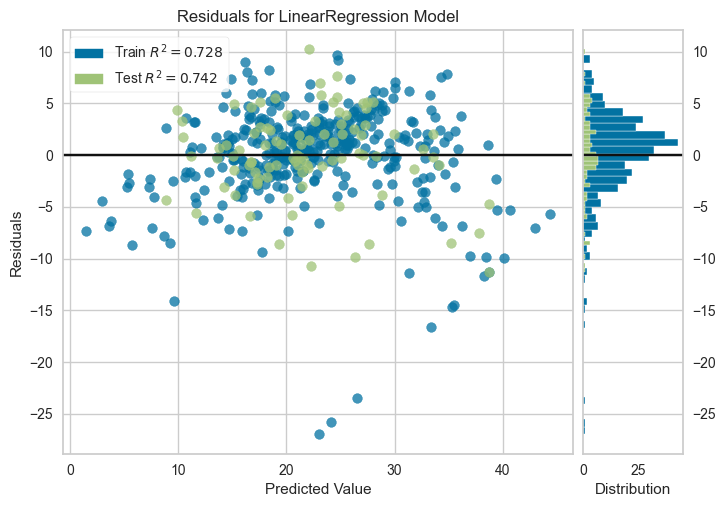

In [93]:
plot_model(lr,plot='residuals' )

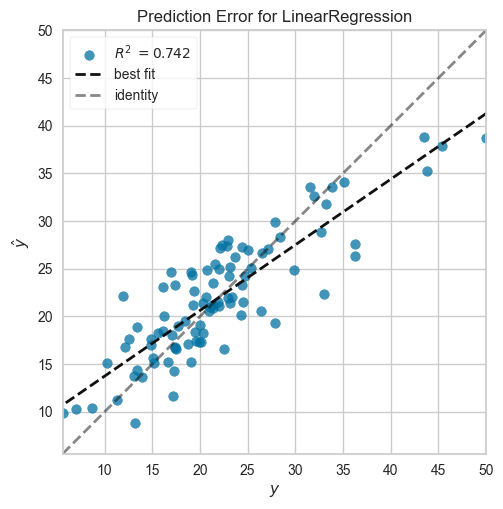

In [94]:
plot_model(lr,plot='error' )

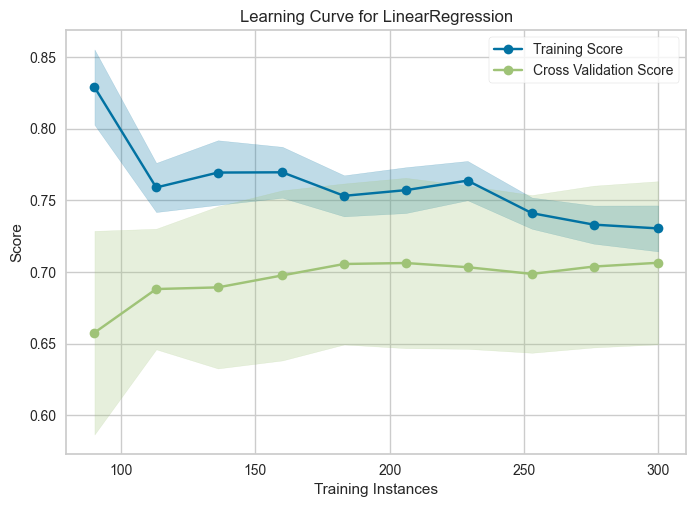

In [95]:
plot_model(lr,plot='learning')

## Predict model

In [96]:
pycaret_predictions = predict_model(lr)
pycaret_predictions

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price,prediction_label
437,15.17720,0.0,18.10,0,0.740,6.152,100.000000,1.9142,8.0,666.0,20.200001,26.450001,8.700000,10.437927
125,0.16902,0.0,25.65,0,0.581,5.986,88.400002,1.9929,1.0,188.0,19.100000,14.810000,21.400000,21.237913
489,0.18337,0.0,27.74,0,0.609,5.414,98.300003,1.7554,3.0,711.0,20.100000,23.969999,7.000000,10.330164
269,0.09065,20.0,6.96,1,0.464,5.920,61.500000,3.9175,2.0,223.0,18.600000,13.650000,20.700001,24.819035
52,0.05360,21.0,5.64,0,0.439,6.511,21.100000,6.8147,3.0,243.0,16.799999,5.280000,25.000000,26.921062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.15038,0.0,25.65,0,0.581,5.856,97.000000,1.9444,1.0,188.0,19.100000,25.410000,17.299999,14.229144
69,0.12816,12.5,6.07,0,0.409,5.885,33.000000,6.4980,3.0,345.0,18.900000,8.790000,20.900000,20.571894
96,0.11504,0.0,2.89,0,0.445,6.163,69.599998,3.4952,1.0,276.0,18.000000,11.340000,21.400000,23.465849
473,4.64689,0.0,18.10,0,0.614,6.980,67.599998,2.5329,8.0,666.0,20.200001,11.660000,29.799999,24.901829


your created model object using PyCaret, has all the attributes and functionalities from the sklearn package:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [97]:
lr.coef_

array([-0.41203114,  0.4311123 ,  0.28422832,  1.0188587 , -1.6776166 ,
        2.5785332 , -0.20933336, -2.6835692 ,  1.0197262 , -0.9478007 ,
       -1.7050642 , -4.1873894 ], dtype=float32)

---
# Additional links:
1. Statsmodel vs Sklearn: https://medium.com/@hsrinivasan2/linear-regression-in-scikit-learn-vs-statsmodels-568b60792991
2. Interpreting the statsmodel output! https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
3. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
4. **scikit-learn**: https://scikit-learn.org/stable/index.html
5. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models